# Ex. 07
## Edge Linking Using Hough Transform 

**Name  :** KISHORE S
**Reg No:** 212224230130
**Slot  :** 4E6-1

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Step 2: Load the image using imread() from cv2 module
image = cv2.imread('tiger.jpg')  # Replace 'image.jpg' with your image path

In [49]:
# Step 3: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(611.5), np.float64(405.5), np.float64(-0.5))

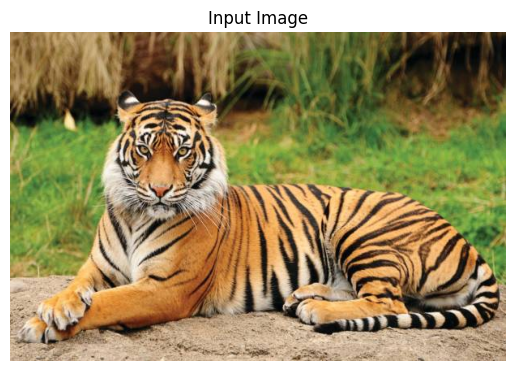

In [50]:
# Input image and grayscale image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert image to RGB for displaying
plt.title("Input Image")
plt.axis('off')

(np.float64(-0.5), np.float64(611.5), np.float64(405.5), np.float64(-0.5))

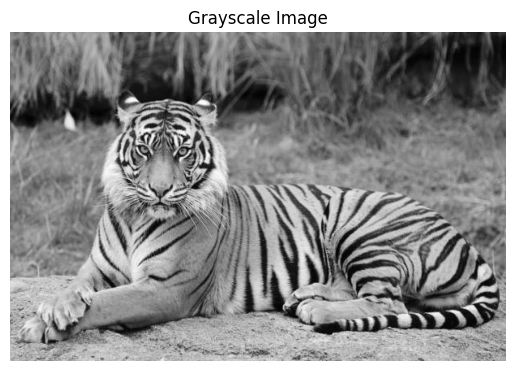

In [51]:
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

In [60]:
# Step 4: Using Canny operator from cv2, detect the edges of the image
edges = cv2.Canny(gray_image, 300, 350)  # Canny edge detection with threshold values 50 and 150

(np.float64(-0.5), np.float64(611.5), np.float64(405.5), np.float64(-0.5))

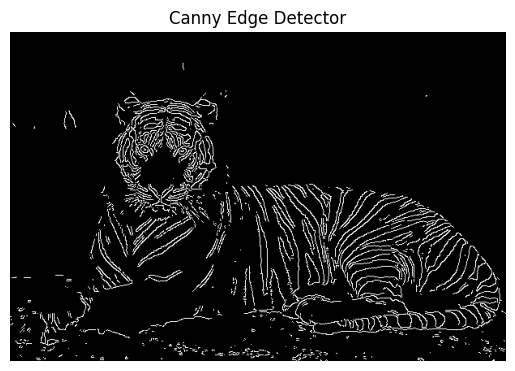

In [61]:
# Canny Edge Detector output
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detector")
plt.axis('off')

In [62]:
# Step 5: Using the HoughLinesP(), detect line coordinates for every point in the image
# The parameters of HoughLinesP are: image, resolution, threshold, minLineLength, maxLineGap
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

In [63]:
# Step 6: Using a for loop, draw the lines on the original image using the detected coordinates
# The lines variable contains the endpoints of the detected lines
for line in lines:
    x1, y1, x2, y2 = line[0]  # Unpacking the line coordinates
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green lines with thickness of 2

(np.float64(-0.5), np.float64(611.5), np.float64(405.5), np.float64(-0.5))

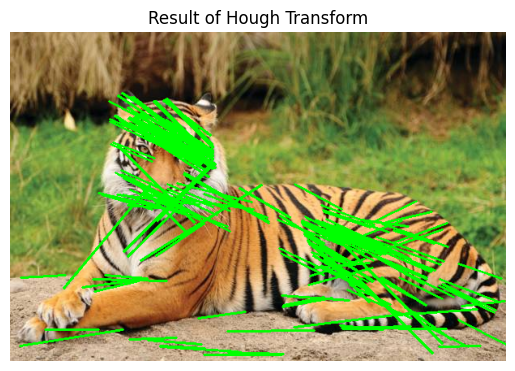

In [64]:
# Display the result of Hough Transform (Image with lines)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Image with lines drawn
plt.title("Result of Hough Transform")
plt.axis('off')